In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/dataset.csv')

In [3]:
data.head()

,x,y,z,class,seg,suspicious
0,-928,523,25,bweep,bweep/右手高位大扫帚扫/repeat_77-duration_120.csv-14-63,False
1,-826,552,102,bweep,bweep/右手高位大扫帚扫/repeat_77-duration_120.csv-14-63,False
2,-866,545,101,bweep,bweep/右手高位大扫帚扫/repeat_77-duration_120.csv-14-63,False
3,-1006,545,49,bweep,bweep/右手高位大扫帚扫/repeat_77-duration_120.csv-14-63,False
4,-1199,548,-20,bweep,bweep/右手高位大扫帚扫/repeat_77-duration_120.csv-14-63,False


In [4]:
#max(3,5,9)

In [5]:
#data[data['seg'] == segs[0]][['x']].size

In [6]:
#max_length = 0
#for seg in segs:
#    max_length = max(max_length, data[data['seg'] == seg][['x']].size)

In [7]:
#max_length

In [8]:
length = []
for g, m in data.groupby('seg'):
    length +=[len(m)]
max_length = max(length)

In [9]:
max_length

77

In [10]:
segs = data.seg.unique()

In [11]:
#segs[:5]

In [12]:
seg = segs[0]

In [13]:
seg_df = data[data['seg'] ==seg][['x', 'y', 'z']]

In [14]:
seg_df.head()

,x,y,z
0,-928,523,25
1,-826,552,102
2,-866,545,101
3,-1006,545,49
4,-1199,548,-20


In [15]:
seg_df.shape

(50, 3)

In [16]:
raw_x = seg_df['x'].values
raw_y = seg_df['y'].values
raw_z = seg_df['z'].values

In [17]:
raw_index = np.linspace(0,max_length,raw_x.size)

In [18]:
raw_index

array([  0.        ,   1.57142857,   3.14285714,   4.71428571,
         6.28571429,   7.85714286,   9.42857143,  11.        ,
        12.57142857,  14.14285714,  15.71428571,  17.28571429,
        18.85714286,  20.42857143,  22.        ,  23.57142857,
        25.14285714,  26.71428571,  28.28571429,  29.85714286,
        31.42857143,  33.        ,  34.57142857,  36.14285714,
        37.71428571,  39.28571429,  40.85714286,  42.42857143,
        44.        ,  45.57142857,  47.14285714,  48.71428571,
        50.28571429,  51.85714286,  53.42857143,  55.        ,
        56.57142857,  58.14285714,  59.71428571,  61.28571429,
        62.85714286,  64.42857143,  66.        ,  67.57142857,
        69.14285714,  70.71428571,  72.28571429,  73.85714286,
        75.42857143,  77.        ])

In [19]:
#plt.plot(raw_index, raw_x, 'ro-', raw_index, raw_y, 'gx:', raw_index, raw_z, 'b*--')

In [20]:
new_index = np.arange(max_length)

In [21]:
f_x = interpolate.interp1d(raw_index, raw_x, kind='cubic')
f_y = interpolate.interp1d(raw_index, raw_y, kind='cubic')
f_z = interpolate.interp1d(raw_index, raw_z, kind='cubic')

In [22]:
new_x = f_x(new_index)
new_y = f_y(new_index)
new_z = f_z(new_index)

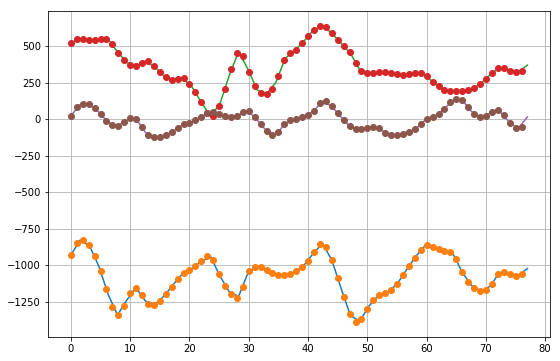

In [23]:
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, frameon=True)
ax.grid(True)
plt.plot(raw_index, raw_x, '-', new_index, new_x, 'o')
plt.plot(raw_index, raw_y, '-', new_index, new_y, 'o')
plt.plot(raw_index, raw_z, '-', new_index, new_z, 'o')

In [24]:
#下面两种方法等效
#train_data = np.array(seg_df).reshape(seg_df.size)
#train_data = seg_df.values.reshape(seg_df.size)

In [25]:
train_data = np.array([new_x,new_y,new_z]).reshape(max_length*3)

In [26]:
train_data.size

231

In [27]:
train_label = seg.split('/')[0]

In [28]:
train_label

'bweep'

In [29]:
df1=pd.DataFrame(np.arange(10).reshape(2,5))

In [30]:
df1

,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9


In [31]:
len_df1 = len(df1)

In [32]:
df1.loc[len_df1,0] = 9
df1.loc[len_df1,1:] = [3,3,3,3]

In [33]:
df1

,0,1,2,3,4
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,9.0,3.0,3.0,3.0,3.0


In [34]:
cols = [str(i) for i in np.arange(max_length*3)]
cols.insert(0,"label")
new_df = pd.DataFrame(columns=cols)

In [35]:
new_df

,label,0,1,2,3,4,5,6,7,8,...,221,222,223,224,225,226,227,228,229,230


In [36]:
len_df = len(new_df)

In [37]:
len_df

0

In [38]:
new_df.loc[len_df,'label'] = train_label
new_df.loc[len_df,1:] = train_data

In [39]:
new_df

,label,0,1,2,3,4,5,6,7,8,...,221,222,223,224,225,226,227,228,229,230
0,bweep,-928,-844.515,-824.544,-857.569,-932.881,-1038.58,-1162.18,-1285.72,-1339.83,...,84.4566,35.6726,14.3099,25.0619,50.0715,60.9978,30.1382,-23.2811,-59.1936,-53.0823


In [40]:
cols = [str(i) for i in np.arange(train_data.size)]
cols.insert(0,"label")
new_df = pd.DataFrame(columns=cols)
for seg in segs:
    seg_df = data[data['seg'] ==seg][['x', 'y', 'z']]
    
    raw_x = seg_df['x'].values
    raw_y = seg_df['y'].values
    raw_z = seg_df['z'].values
    raw_index = np.linspace(0,max_length,raw_x.size)
    
    
    f_x = interpolate.interp1d(raw_index, raw_x, kind='cubic')
    f_y = interpolate.interp1d(raw_index, raw_y, kind='cubic')
    f_z = interpolate.interp1d(raw_index, raw_z, kind='cubic')
    
    new_index = np.arange(max_length)
    new_x = f_x(new_index)
    new_y = f_y(new_index)
    new_z = f_z(new_index)
    
    train_data = np.array([new_x,new_y,new_z]).reshape(max_length*3)
    train_label = seg.split('/')[0]
    
    len_df = len(new_df)
    new_df.loc[len_df,'label'] = train_label
    new_df.iloc[len_df,1:] = list(train_data)

In [53]:
new_df.head()

,label,0,1,2,3,4,5,6,7,8,...,221,222,223,224,225,226,227,228,229,230
0,bweep,-928,-844.515,-824.544,-857.569,-932.881,-1038.58,-1162.18,-1285.72,-1339.83,...,84.4566,35.6726,14.3099,25.0619,50.0715,60.9978,30.1382,-23.2811,-59.1936,-53.0823
1,bweep,-986,-910.49,-866.202,-858.734,-890.486,-944.596,-1040.09,-1250.22,-1437.67,...,68.2235,16.034,-10.815,-5.30804,21.9242,41.6942,10.0096,-55.3843,-111.554,-144.264
2,bweep,-1045,-985.347,-957.773,-950.061,-950.003,-947.528,-938.07,-917.297,-879.821,...,-43.4504,-60.1701,-73.671,-83.5414,-91.2885,-99.0951,-106.147,-110.306,-110.209,-104.793
3,bweep,-951,-948.333,-929.124,-899.586,-865.923,-829.197,-777.499,-736.117,-810.86,...,-95.7179,-105.873,-118.947,-132.116,-143.71,-152.957,-160.827,-168.555,-173.809,-172.866
4,bweep,-1081,-1043.79,-1023.65,-1001.26,-957.304,-890.237,-843.907,-841.828,-850.794,...,-75.1123,-98.6839,-135.222,-161.786,-175.667,-185.447,-193.11,-196.469,-187.462,-155.753


In [60]:
new_df['label'][300]

'dump'

In [41]:
values1 = new_df.loc[0].drop('label').values
values2· = new_df.loc[158].drop('label').values
values3 = new_df.loc[187].drop('label').values

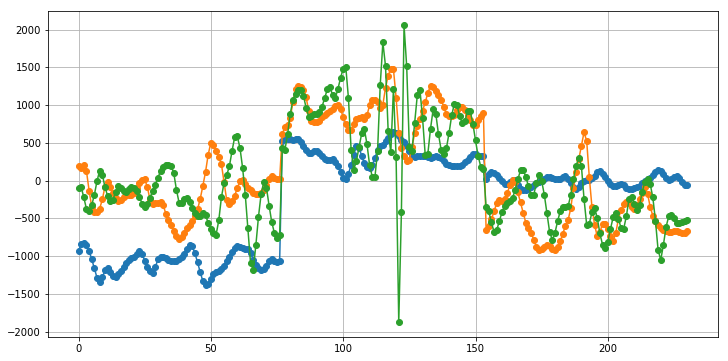

In [42]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, frameon=True)
ax.grid(True)
plt.plot(values1, '-o')
plt.plot(values2, '-o')
plt.plot(values3, '-o')

In [43]:
len(new_df)

847

In [44]:
labels = new_df.label.unique()

In [45]:
labels

array(['bweep', 'sweep', 'clean', 'dump'], dtype=object)

In [808]:
temp_df = new_df[new_df['label'] ==labels[0]]
temp_len = int(len(temp_df)*2/3)
temp_train_df = temp_df.iloc[:temp_len]
temp_test_df = temp_df.iloc[temp_len:]

In [809]:
temp_train_df.tail()

,label,0,1,2,3,4,5,6,7,8,...,221,222,223,224,225,226,227,228,229,230
627,bweep,-590,-576.755,-567.034,-546.816,-514.361,-495.651,-483.755,-484.705,-546.003,...,1183.38,1159.47,1123.64,1027.17,858.998,790.593,823.691,843.852,761.745,620.894
628,bweep,-538,-525.822,-584.677,-650.868,-684.035,-709.931,-870.185,-1105.44,-1217.39,...,812.849,889.037,919.684,837.912,727.696,643.365,620.685,661.045,683.086,668.823
629,bweep,-343,-329,-188.763,-21.8899,84.1794,134.252,162.855,173.086,124.166,...,787.403,793.304,794.98,790.496,777.533,764.632,770.068,784.849,799.665,831.063
630,bweep,-206,-247.333,-324.316,-410.866,-483.112,-538.243,-582.275,-612.897,-636.683,...,684.727,690.401,685.941,671.287,667.246,680.358,703.481,735.94,768.584,772.816
631,bweep,-281,-283.712,-439.018,-635.595,-768.042,-827.791,-884.412,-1004.3,-1193.84,...,942.734,890.678,842.612,804.135,786.901,778.641,764.784,750.267,738.905,729.119


In [810]:
temp_test_df.head()

,label,0,1,2,3,4,5,6,7,8,...,221,222,223,224,225,226,227,228,229,230
632,bweep,-575,-606.357,-521.696,-388.477,-273.529,-205.93,-157.186,-115.583,-90.3342,...,765.229,808.881,845.175,869.61,885.853,909.895,946.388,987.719,1027.78,1061.8
633,bweep,-108,-283.347,-350.037,-362.025,-401.543,-487.591,-562.811,-633.911,-675.121,...,1006.4,1088.28,1147.15,1161.94,1121.08,1046.89,940.857,851.835,853.308,922.626
634,bweep,-213,-184.829,-144.394,-46.5269,-6.79038,15.7725,35.905,99.218,151.093,...,928.336,972.873,986.357,944.975,927.727,1042.57,1153.16,1209.72,1148.85,841.166
635,bweep,-370,-369.997,-441.108,-522.703,-560.663,-562.831,-564.581,-580.152,-606.309,...,1141.46,1216.26,1261.05,1290.47,1308.62,1234.49,971.483,717.919,631.77,624.335
636,bweep,-341,-296.52,-466.118,-678.559,-801.576,-866.52,-903.372,-906.926,-928.748,...,910.833,934.396,955.917,979.521,996.217,985.624,944.65,879.563,801.891,724.14


In [811]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()
for label in labels:
    temp_df = new_df[new_df['label'] ==label]
    temp_len = int(len(temp_df)*2/3)
    temp_train_df = temp_df.iloc[:temp_len]
    train_df = pd.concat([train_df, temp_train_df])
    temp_test_df = temp_df.iloc[temp_len:]
    test_df = pd.concat([test_df, temp_test_df])

In [812]:
len(train_df)

563

In [813]:
len(test_df)

284

In [635]:
#temp_df.to_csv('./data/processed_data/{}.csv'.format(label), index=False)